# CNN for Image Classification with TensorFlow

This notebook demonstrates how to build, train, and evaluate a Convolutional Neural Network (CNN) for image classification using TensorFlow and the Keras API. We will be using the **CIFAR-10 dataset**.

### Workflow:
1.  **Load and Preprocess Data**: Load the CIFAR-10 dataset and normalize the images.
2.  **Explore the Data**: Visualize some sample images.
3.  **Build the CNN Model**: Define the architecture with convolutional and dense layers.
4.  **Compile and Train**: Compile the model with an optimizer and loss function, then train it on the training data.
5.  **Evaluate Performance**: Test the model's accuracy on the unseen test dataset.
6.  **Visualize Results**: Plot the training history and look at sample predictions.

## 1. Setup and Library Imports

First, we import the necessary libraries. We need `tensorflow` for building the model, `matplotlib` for plotting, and `numpy` for numerical operations.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.20.0


## 2. Load and Preprocess the CIFAR-10 Dataset

The CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes, with 6,000 images per class. We will load the data and normalize the pixel values to be between 0 and 1.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("Data loaded successfully.")
print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 94s 1us/step
Data loaded successfully.
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


Let's visualize the first 25 images from the training set to get a feel for the data.

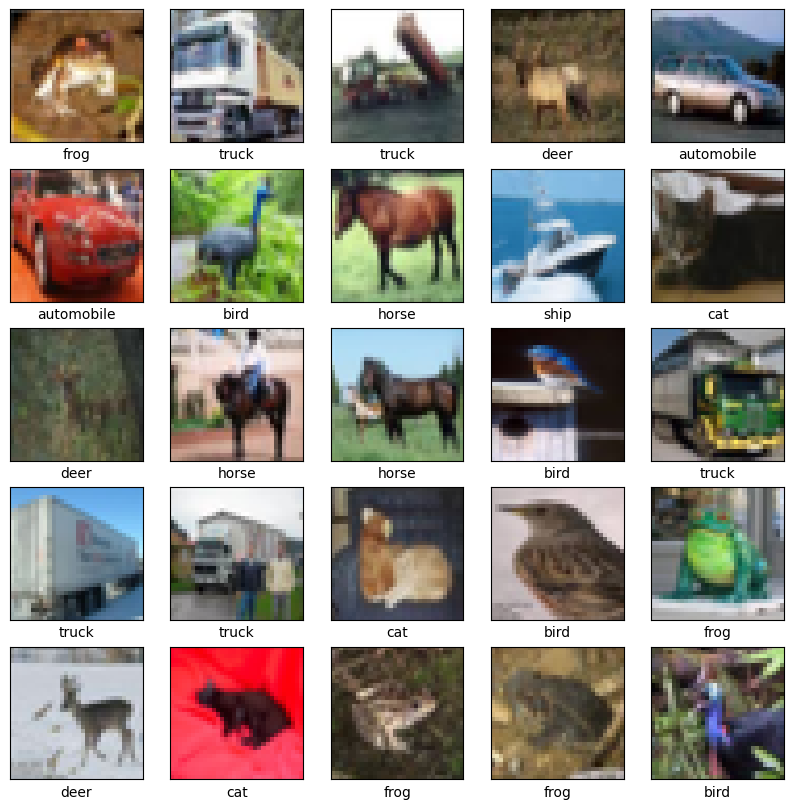

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## 3. Build the Convolutional Neural Network (CNN)

The model consists of a **convolutional base** and a **dense head**.
- **Convolutional Base**: A stack of `Conv2D` and `MaxPooling2D` layers to extract features from the images.
- **Dense Head**: A few `Dense` layers on top to perform the final classification.

In [4]:
model = models.Sequential()

# Convolutional Base
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense Head
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # 10 output neurons for 10 classes

# Print the model's architecture
model.summary()

C:\Users\Mohammad Asim Ansari\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Compile and Train the Model

Now we configure the model for training using the `adam` optimizer and `SparseCategoricalCrossentropy` as the loss function. We'll train it for 10 epochs.

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print("Training the model...")
# This will take a few minutes to run
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
print("Model training complete.")

Training the model...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.4561 - loss: 1.4954 - val_accuracy: 0.5511 - val_loss: 1.2358
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6009 - loss: 1.1311 - val_accuracy: 0.6077 - val_loss: 1.0961
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6601 - loss: 0.9705 - val_accuracy: 0.6782 - val_loss: 0.9374
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6904 - loss: 0.8792 - val_accuracy: 0.6791 - val_loss: 0.9250
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7177 - loss: 0.8101 - val_accuracy: 0.6756 - val_loss: 0.9288
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7363 - loss: 0.7522 - val_accuracy: 0.7015 - val_loss: 0.8807
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7511 - loss: 0.7097 - val_accuracy: 0.7076 - val_loss: 0.8470
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - a

## 5. Evaluate the Model's Performance

Let's see how the model performs on the test dataset that it has never seen before.

In [6]:
print("\nEvaluating model performance...")
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Evaluating model performance...
313/313 - 2s - 5ms/step - accuracy: 0.7116 - loss: 0.8744

Test Accuracy: 0.7116
Test Loss: 0.8744


An accuracy of ~70% is a respectable baseline for this simple CNN on the CIFAR-10 dataset.

## 6. Visualize Training History and Predictions

Plotting the training and validation accuracy/loss helps us see if the model is overfitting.

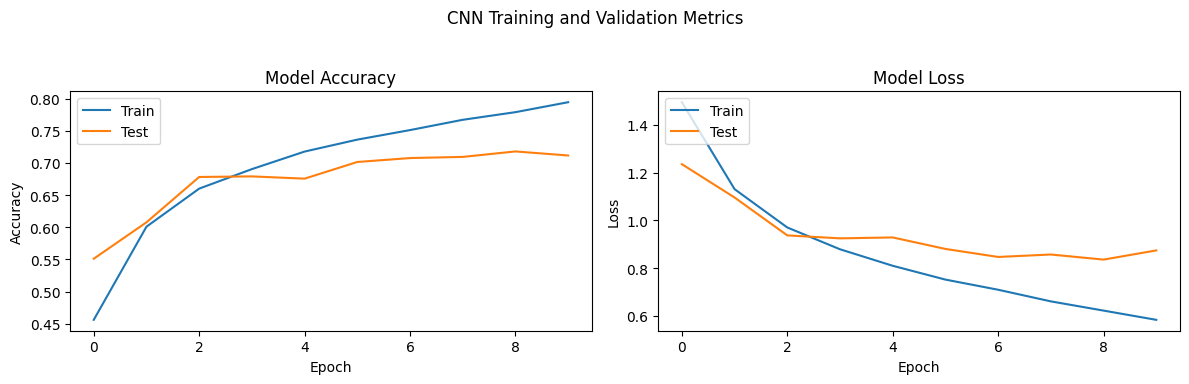

In [7]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.suptitle("CNN Training and Validation Metrics")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Finally, let's use our trained model to make predictions on some test images and see how it does. We'll color correct predictions in green and incorrect ones in red.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


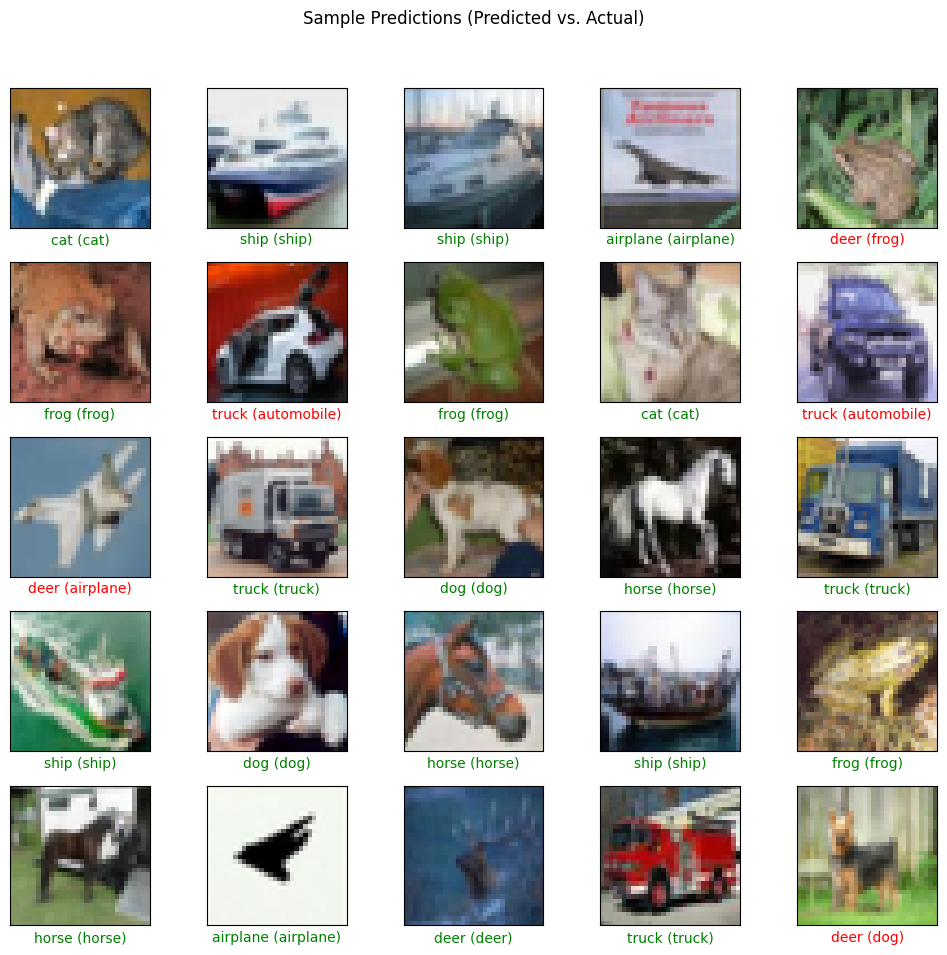

In [8]:
predictions = model.predict(test_images)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i][0]
    
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

plt.suptitle("Sample Predictions (Predicted vs. Actual)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()